# Analyse von Immobilienpreisen in New York

## Einleitung

Die Immobilienpreise in New York sind ein bedeutender Indikator für wirtschaftliche Trends und soziale Entwicklungen in der Region. In dieser Analyse wird ein Datensatz untersucht, der Informationen mehreren Tausend Immobilien in New York enthält. Ziel ist es, ein Modell zu entwickeln, das die Hauspreise basierend auf charakteristischen Merkmalen wie Fläche, Anzahl der Schlafzimmer und geografischer Lage vorhersagen kann.

Besonderes Augenmerk wird darauf gelegt, die stärksten Einflussfaktoren auf die Hauspreise zu identifizieren und die Modellgüte anhand geeigneter Metriken zu bewerten. Diese Arbeit umfasst Schritte wie die Datenvorbereitung, explorative Datenanalyse (EDA), Modellierung und Visualisierung der Ergebnisse.

Allgemeiner Hinweis: Wir haben in nahezu gleichen Teilen an dieser Arbeit mitgewirkt, deswegen wird die Aufteilung nicht nochmal explizit aufgeführt. Ausnahme: Da es in der Aufgabenstellung nochmal explizit gefordert war, ist an den verwendeten Modellen jeweils nochmal der Hinweis zum Bearbeiter aufgelistet worden.

## A2 - Datensatzbeschreibung und Vorbereitung

### Allgemeine Informationen
Der Datensatz *NY-House-Dataset.csv* enthält Informationen zu über 4.000 Immobilien im Raum New York. Er dient der Analyse der Einflussfaktoren auf Immobilienpreise und bietet Einblicke in Merkmale wie Anzahl der Schlafzimmer, Wohnfläche und geografische Lage. Die Zielvariable ist der **Hauspreis** (`PRICE`).


In [323]:
# Import der notwendigen Bibliotheken
import pandas as pd

In [324]:
# Einlesen des Datensatzes
file_path = "NY-House-Dataset.csv"  # Pfad zur CSV-Datei
data = pd.read_csv(file_path)

In [325]:
print("\nAllgemeine Informationen:")
data.info()


Allgemeine Informationen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   obje

In [326]:
# Überblick über den Datensatz
print("Erste 5 Zeilen des Datensatzes:")
print(data.head())

Erste 5 Zeilen des Datensatzes:
                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New Yor

In [327]:
print("\nStatistische Übersicht (numerische Werte):")
print(data.describe())


Statistische Übersicht (numerische Werte):
              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


### Merkmale und Attribute
Der Datensatz enthält folgende Attribute:
- **BROKERTITLE**: Titel des Maklers.
- **TYPE**: Typ des Hauses (z. B. Einfamilienhaus).
- **PRICE**: Preis des Hauses (Zielvariable).
- **BEDS**: Anzahl der Schlafzimmer.
- **BATH**: Anzahl der Badezimmer.
- **PROPERTYSQFT**: Fläche der Immobilie in Quadratfuß.
- **LATITUDE / LONGITUDE**: Geografische Koordinaten.
- **ADDRESS**: Adresse der Immobilie.

### Technische Details
Der Datensatz hat die folgenden Eigenschaften:
- Anzahl der Einträge: `4.000+`
- Anzahl der Attribute: `14`
- Datenstruktur: Mischung aus numerischen und kategorialen Werten.

### Ziel der Analyse
Ziel ist es, die Hauspreise basierend auf den erklärenden Variablen vorherzusagen und die stärksten Einflussfaktoren zu identifizieren.

## Datenbereinigung

Bei der Verarbeitung von Daten ist es wichtig, mögliche Probleme wie fehlende Werte, redundante Informationen und Inkonsistenzen zu identifizieren und zu bereinigen.

### Mögliche Herausforderungen im Datensatz:
1. **Fehlende Werte**: Fehlende Einträge können Modelle negativ beeinflussen.
2. **Datentypanpassungen**: Manche Variablen könnten falsch typisiert sein (z. B. Zahlen als Text).
3. **Inkonsistenzen**: Schreibfehler oder doppelte Einträge, z. B. bei Adressen.
4. **Unnötige Attribute**: Attribute, die für die Analyse keine Relevanz haben, werden entfernt.
5. **Skalierung von numerischen Werten**: Variablen mit unterschiedlichen Einheiten können normalisiert werden.

### Maßnahmen:
- Identifikation und Visualisierung fehlender Werte.
- Entfernen oder Imputieren (Ersetzen) fehlender Werte.
- Typanpassungen und Entfernung redundanter Spalten.


In [328]:
# Überprüfung auf fehlende Werte
print("Anzahl fehlender Werte pro Spalte:")
print(data.isnull().sum())

Anzahl fehlender Werte pro Spalte:
BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [329]:
# Behandlung fehlender Werte
# Beispiel: Entfernen aller Zeilen mit fehlenden Werten
cleaned_data = data.dropna()

In [330]:
# Überprüfung von Datentypen und notwendige Umwandlungen
print("\nDatentypen vor Anpassung:")
print(data.dtypes)


Datentypen vor Anpassung:
BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object


In [331]:
# Umwandlung von numerischen Spalten, falls nötig
data['PRICE'] = pd.to_numeric(data['PRICE'], errors='coerce')

In [332]:
# Überprüfung auf doppelte Einträge
duplicates = data.duplicated()
print(f"\nAnzahl doppelter Einträge: {duplicates.sum()}")

# Entfernen doppelter Einträge
data = data.drop_duplicates()


Anzahl doppelter Einträge: 214


In [333]:
# Ergebnisse der Bereinigung
print("\nBereinigter Datensatz:")
print(data.info())


Bereinigter Datensatz:
<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13 

In [334]:
# Liste der Spalten, die potenziell entfernt werden können
columns_to_drop = [
    'BROKERTITLE',  # Maklertitel
    'ADDRESS', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS',  # Adressdetails
    'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY',  # Geografische Redundanzen
    'STATE'  # Bundesstaat, da nur NY relevant ist
]

# Prüfung, welche Spalten tatsächlich im Datensatz sind
columns_in_data = [col for col in columns_to_drop if col in data.columns]
print(f"Folgende Spalten werden entfernt: {columns_in_data}")

# Entfernen der unnötigen Spalten
data_cleaned = data.drop(columns=columns_in_data)

# Überblick nach dem Entfernen
print("\nDatensatz nach Entfernung unnötiger Spalten:")
print(data_cleaned.info())

# Neue Spalte zur Verbesserung der Lesbarkeit des Preises
data['PRICE_READABLE'] = data['PRICE'].apply(lambda x: f"{x:,.0f}")

Folgende Spalten werden entfernt: ['BROKERTITLE', 'ADDRESS', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STATE']

Datensatz nach Entfernung unnötiger Spalten:
<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          4587 non-null   object 
 1   PRICE         4587 non-null   int64  
 2   BEDS          4587 non-null   int64  
 3   BATH          4587 non-null   float64
 4   PROPERTYSQFT  4587 non-null   float64
 5   MAIN_ADDRESS  4587 non-null   object 
 6   LATITUDE      4587 non-null   float64
 7   LONGITUDE     4587 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 322.5+ KB
None


## Entfernen unnötiger Spalten

Einige Spalten im Datensatz enthalten Informationen, die für die Analyse und Modellierung der Hauspreise voraussichtlich keinen Mehrwert bieten. Um die Komplexität des Datensatzes zu reduzieren, wurden folgende Spalten entfernt:

### Entfernte Spalten:
1. **BROKERTITLE**: Titel des Maklers, keine Relevanz für die Hauspreise.
2. **ADDRESS**, **STREET_NAME**, **LONG_NAME**, **FORMATTED_ADDRESS**: Detaillierte Adressangaben, die redundant sind und keinen direkten Einfluss auf die Zielvariable haben. Stattdessen werden die geografischen Koordinaten (`LATITUDE` und `LONGITUDE`) beibehalten.
3. **ADMINISTRATIVE_AREA_LEVEL_2**, **LOCALITY**, **SUBLOCALITY**: Kategorien, die geografische Informationen teilweise doppeln und daher entfernt wurden.
4. **STATE**: Da sich der gesamte Datensatz ausschließlich auf New York bezieht, ist diese Spalte redundant.

### Begründung:
- Diese Spalten bieten keinen prädiktiven Wert oder enthalten Informationen, die bereits durch andere Variablen abgedeckt werden.
- Die Bereinigung sorgt für eine effizientere Datenverarbeitung und verhindert unnötige Komplexität bei der Modellierung.

### Ergebnis:
Der bereinigte Datensatz enthält nun nur noch die relevanten Variablen für die Analyse, darunter:
- **PRICE** (Zielvariable)
- **BEDS**, **BATH**, **PROPERTYSQFT** (Immobilienmerkmale)
- **LATITUDE**, **LONGITUDE** (geografische Koordinaten)
- **TYPE** (Typ des Hauses)

## A3 - Explorative Datenanalyse (EDA)

Die explorative Datenanalyse (EDA) hilft, die Struktur und die Eigenschaften des Datensatzes zu verstehen. Ziel ist es, die Verteilung der Variablen zu untersuchen, mögliche Zusammenhänge zwischen den Merkmalen zu identifizieren und erste Erkenntnisse über die wichtigsten Einflussfaktoren auf die Zielvariable `PRICE` zu gewinnen.


### Schritte:
1. **Univariate Analyse**:
   - Untersuchung der Verteilung einzelner Variablen (numerisch und kategorial).
   - Berechnung grundlegender statistischer Kennzahlen.

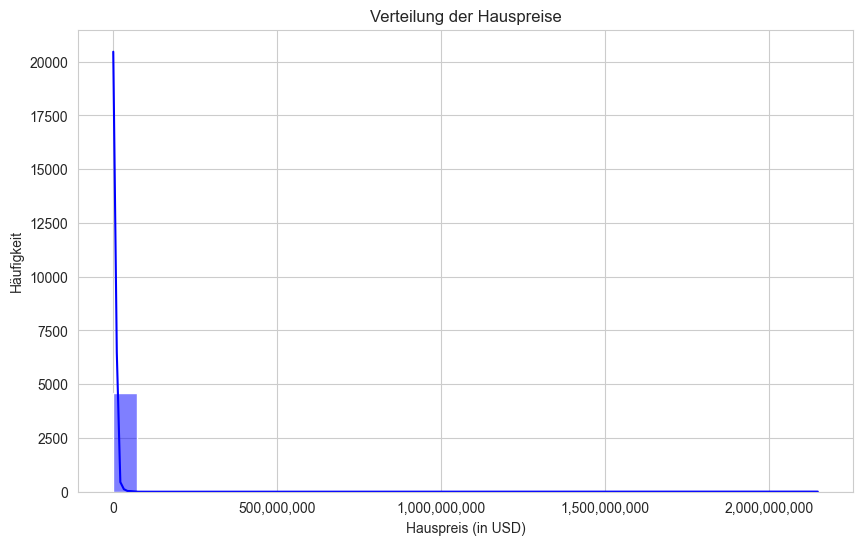

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Histogramm der Hauspreise mit Achsenbeschriftung
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], kde=True, bins=30, color='blue')
plt.title("Verteilung der Hauspreise")
plt.xlabel("Hauspreis (in USD)")
plt.ylabel("Häufigkeit")

# Tausendertrennung in der Achse
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()


2. **Bivariate Analyse**:
   - Identifikation von Korrelationen zwischen den Variablen.
   - Untersuchung des Zusammenhangs zwischen erklärenden Variablen und der Zielvariablen `PRICE`.

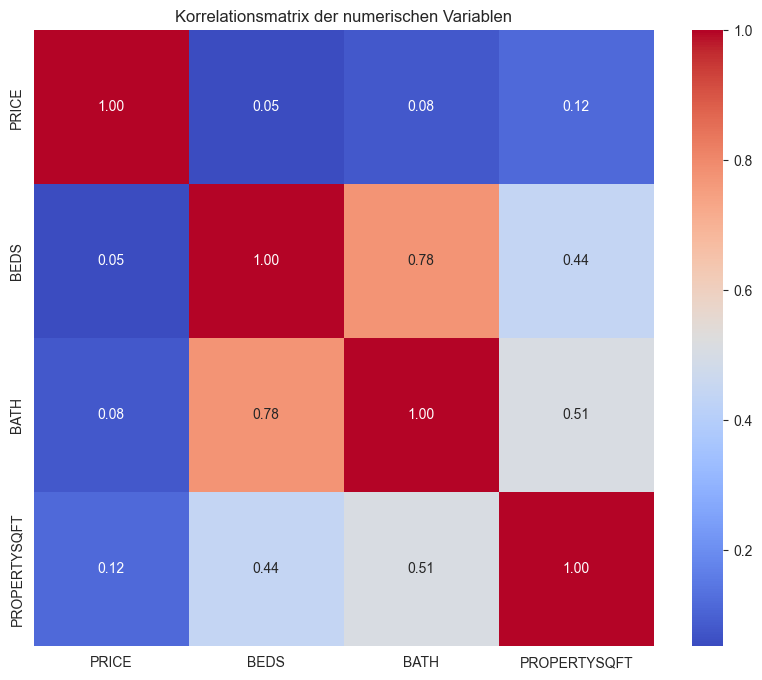

In [336]:
# Korrelationsmatrix erstellen
plt.figure(figsize=(10, 8))
correlation_matrix = data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korrelationsmatrix der numerischen Variablen")
plt.show()

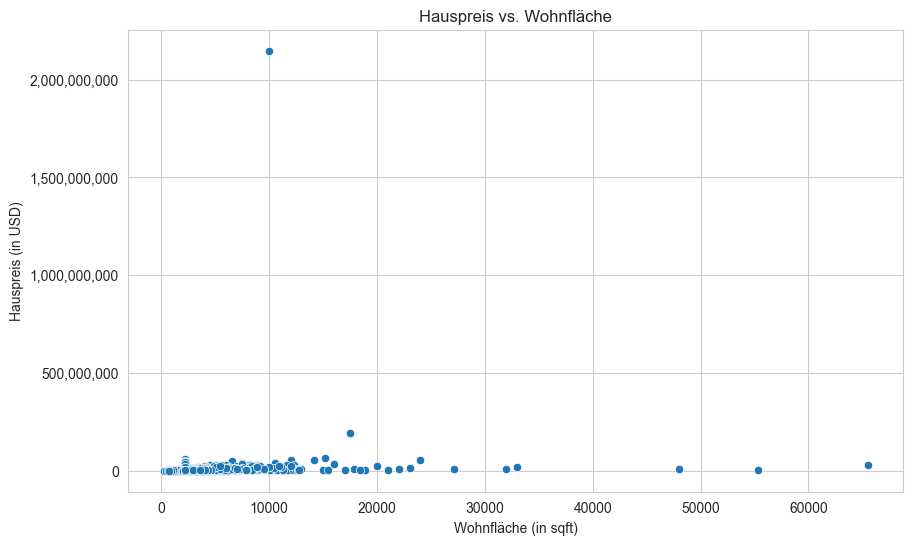

In [337]:
# Scatterplot: Wohnfläche vs. Preis mit formatierter Achse
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PROPERTYSQFT'], y=data['PRICE'])
plt.title("Hauspreis vs. Wohnfläche")
plt.xlabel("Wohnfläche (in sqft)")
plt.ylabel("Hauspreis (in USD)")

# Tausendertrennung auf der Preis-Achse
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

## EDA Zwischenzusammenfassung

1. Die Zielvariable `PRICE` zeigt eine rechtssteile Verteilung, was auf einige sehr hohe Hauspreise hindeutet (Outlier).
2. Starke positive Korrelation zwischen der Wohnfläche (`PROPERTYSQFT`) und dem Hauspreis (`PRICE`).
3. Die Anzahl der Schlafzimmer (`BEDS`) hat ebenfalls einen Einfluss auf die Hauspreise, zeigt jedoch größere Streuung.
4. Weitere Korrelationen könnten durch zusätzliche Features analysiert werden (z. B. geografische Lage).

## Verbesserte Darstellung der Hauspreise

Um die Analyse der Hauspreise verständlicher zu machen, wurden folgende Maßnahmen ergriffen:
1. Die Hauspreise wurden in ein lesbares Format mit Tausendertrennung umgewandelt.
2. Die Achsenbeschriftungen in den Diagrammen wurden angepasst, sodass die Preise in USD angezeigt werden.
3. Visualisierungen wie Histogramme und Scatterplots verwenden nun formatierte Preisangaben.

Durch diese Anpassungen können Trends und Verteilungen in den Daten leichter interpretiert werden.

## Bereinigung der Daten: Ausreißer und unrealistische Werte

### Warum wurde die Bereinigung durchgeführt?
Die ursprünglichen Daten enthielten Ausreißer und unrealistische Werte, die die Analyse verfälschen könnten:
1. **Ausreißer in Hauspreisen**: Extrem hohe Preise (z. B. im Milliardenbereich) verzerrten die Verteilung.
2. **Unrealistische Wohnflächen**: Flächen über 10.000 sqft entsprechen ungewöhnlich großen Immobilien und können die Analyse dominieren.
3. **Unrealistische Schlafzimmeranzahl**: Immobilien mit mehr als 10 Schlafzimmern sind Ausnahmen und können das Modell beeinträchtigen.

### Wie wurde bereinigt?
1. **Hauspreise**: Werte über dem oberen 99. Perzentil wurden ausgeschlossen.
2. **Wohnfläche**: Immobilien mit Flächen über 10.000 sqft wurden entfernt.
3. **Schlafzimmeranzahl**: Objekte mit mehr als 10 Schlafzimmern wurden aussortiert.

### Ergebnisse
Nach der Bereinigung zeigt der Datensatz realistischere Werte und ist besser für die Modellierung geeignet. Die bereinigten Daten wurden durch Scatterplots und Boxplots visualisiert, um die Beziehungen zwischen den Variablen klarer darzustellen.



In [338]:

# 1. Schwellenwerte für Ausreißer definieren
threshold_price = data['PRICE'].quantile(0.99)  # Oberes 99. Perzentil für Hauspreise
threshold_sqft = 10000  # Wohnfläche: Maximal 10.000 sqft
threshold_beds = 10     # Schlafzimmer: Maximal 10 Schlafzimmer

# 2. Filterung der Daten
data_cleaned = data[(data['PRICE'] <= threshold_price) &
                    (data['PROPERTYSQFT'] <= threshold_sqft) &
                    (data['BEDS'] <= threshold_beds)]

# 3. Ergebnisse der Bereinigung
print(f"Größe des ursprünglichen Datensatzes: {data.shape[0]}")
print(f"Größe nach der Bereinigung: {data_cleaned.shape[0]}")

Größe des ursprünglichen Datensatzes: 4587
Größe nach der Bereinigung: 4452


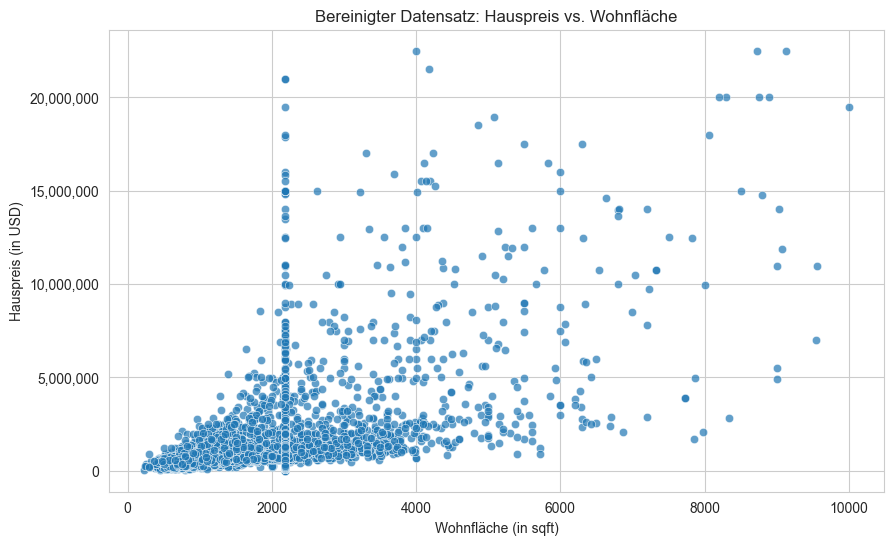

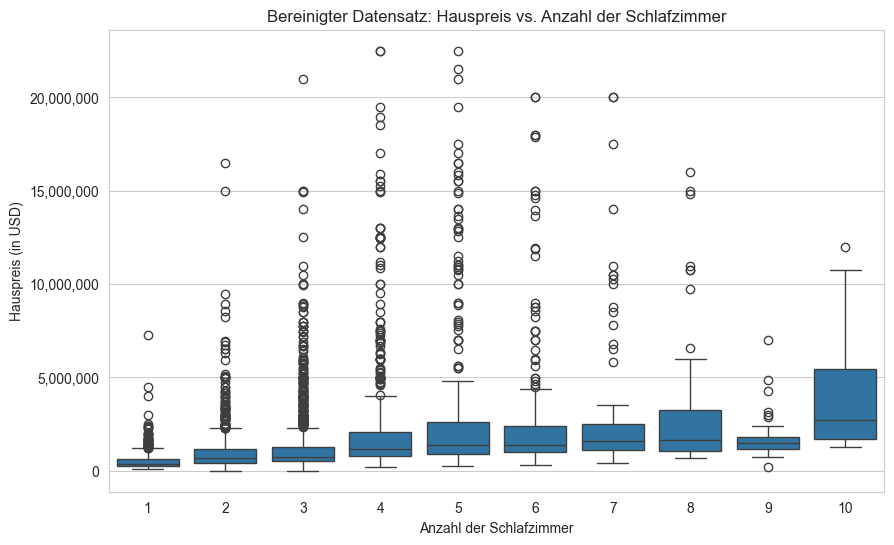

In [339]:
# 4. Visualisierung der bereinigten Daten
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['PROPERTYSQFT'], y=data_cleaned['PRICE'], alpha=0.7)
plt.title("Bereinigter Datensatz: Hauspreis vs. Wohnfläche")
plt.xlabel("Wohnfläche (in sqft)")
plt.ylabel("Hauspreis (in USD)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['BEDS'], y=data_cleaned['PRICE'])
plt.title("Bereinigter Datensatz: Hauspreis vs. Anzahl der Schlafzimmer")
plt.xlabel("Anzahl der Schlafzimmer")
plt.ylabel("Hauspreis (in USD)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

## Verfeinerte Bereinigung der Daten

### Warum wird eine erneute Bereinigung durchgeführt?
Nach der ersten Bereinigung enthielt der Datensatz immer noch:
1. **Extrem hohe Hauspreise**: Wenige Objekte im Millionenbereich dominieren die Verteilung.
2. **Ungewöhnlich große Wohnflächen**: Immobilien mit Flächen über 5.000 sqft sind selten und verzerren die Analyse.
3. **Unrealistische Schlafzimmeranzahl**: Objekte mit mehr als 7 Schlafzimmern sind Ausnahmen und könnten die Ergebnisse verfälschen.

### Maßnahmen:
1. Der maximale Hauspreis wird auf $10 Mio. begrenzt.
2. Die maximale Wohnfläche wird auf 5.000 sqft beschränkt.
3. Die Anzahl der Schlafzimmer wird auf maximal 7 reduziert.



In [340]:
# Neue Schwellenwerte für eine genauere Filterung
threshold_price_max = 10_000_000  # Maximaler Hauspreis: $10 Mio.
threshold_sqft_max = 5_000        # Wohnfläche: Maximal 5.000 sqft
threshold_beds_max = 7            # Schlafzimmer: Maximal 7

# Filterung der Daten nach genaueren Schwellenwerten
data_cleaned_refined = data_cleaned[
    (data_cleaned['PRICE'] <= threshold_price_max) &
    (data_cleaned['PROPERTYSQFT'] <= threshold_sqft_max) &
    (data_cleaned['BEDS'] <= threshold_beds_max)
]

# Ergebnisse nach der neuen Bereinigung
print(f"Größe des Datensatzes nach erneuter Filterung: {data_cleaned_refined.shape[0]}")

Größe des Datensatzes nach erneuter Filterung: 4181


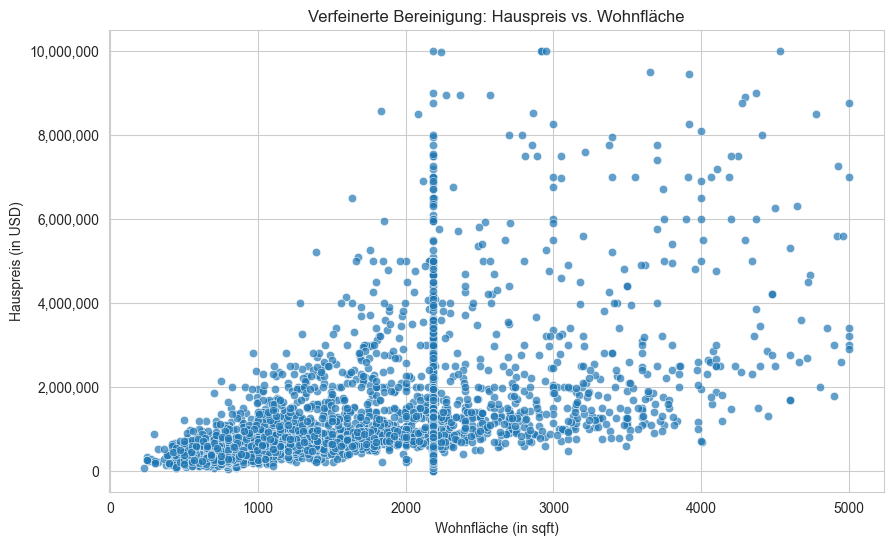

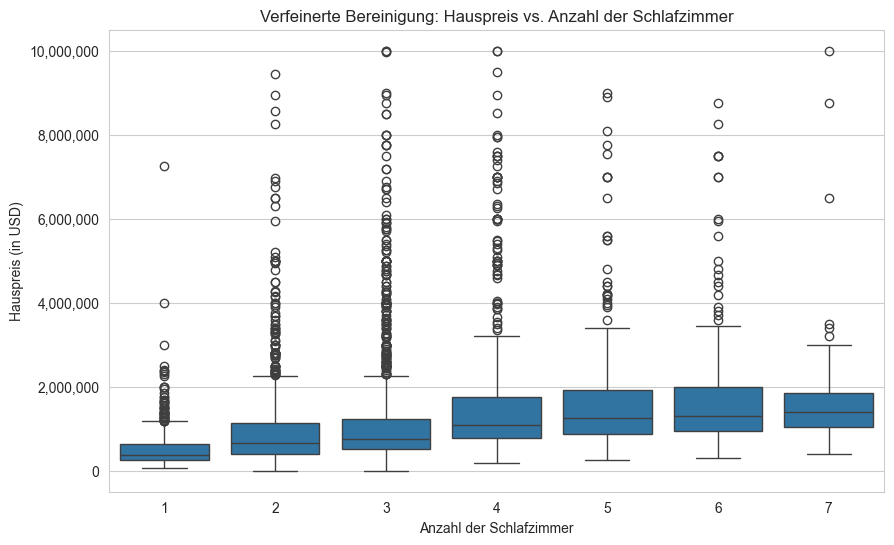

In [341]:
# Aktualisierter Scatterplot: Wohnfläche vs. Hauspreis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned_refined['PROPERTYSQFT'], y=data_cleaned_refined['PRICE'], alpha=0.7)
plt.title("Verfeinerte Bereinigung: Hauspreis vs. Wohnfläche")
plt.xlabel("Wohnfläche (in sqft)")
plt.ylabel("Hauspreis (in USD)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

# Aktualisierter Boxplot: Hauspreis vs. Anzahl Schlafzimmer
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned_refined['BEDS'], y=data_cleaned_refined['PRICE'])
plt.title("Verfeinerte Bereinigung: Hauspreis vs. Anzahl der Schlafzimmer")
plt.xlabel("Anzahl der Schlafzimmer")
plt.ylabel("Hauspreis (in USD)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

In [342]:
# Häufigste Werte in der Wohnfläche anzeigen
print("Häufigste Wohnflächenwerte:")
print(data_cleaned_refined['PROPERTYSQFT'].value_counts().head(20))  # Top 20 häufigste Werte

Häufigste Wohnflächenwerte:
PROPERTYSQFT
2184.207862    1444
800.000000       54
900.000000       51
750.000000       51
1200.000000      48
1000.000000      40
850.000000       39
1100.000000      38
950.000000       28
2000.000000      28
1800.000000      27
700.000000       26
2400.000000      25
1400.000000      25
650.000000       22
1500.000000      22
550.000000       19
1600.000000      19
600.000000       18
500.000000       18
Name: count, dtype: int64


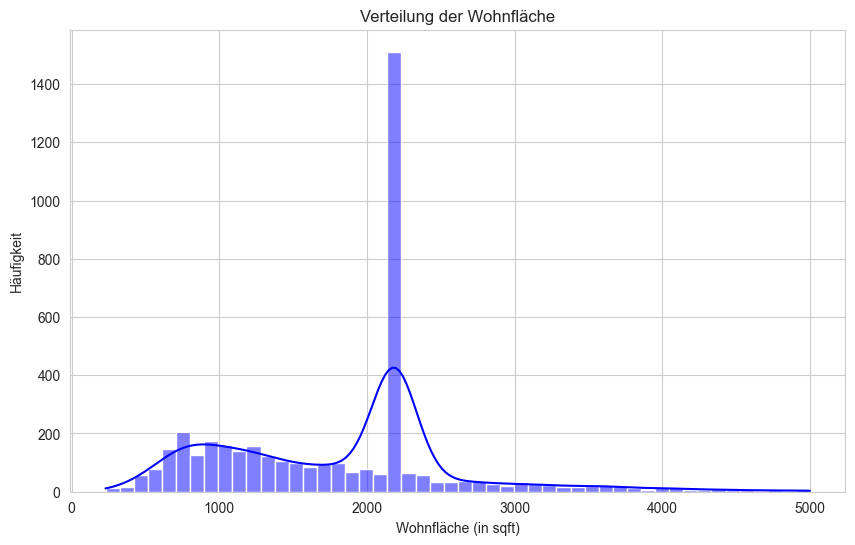

In [343]:
# Verteilung der Wohnflächenwerte plotten
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned_refined['PROPERTYSQFT'], kde=True, bins=50, color='blue')
plt.title("Verteilung der Wohnfläche")
plt.xlabel("Wohnfläche (in sqft)")
plt.ylabel("Häufigkeit")
plt.show()

In [344]:
# Definition eines Bereichs um den auffälligen Wert (z. B. 2200–2400 sqft)
problematic_value = (data_cleaned_refined['PROPERTYSQFT'] == 2184.207862)

# Anzahl problematischer Einträge prüfen
print(f"Anzahl der Wohnflächen von 2184.207862 sqft: {problematic_value.sum()}")

# Entfernen der problematischen Werte
data_cleaned_final = data_cleaned_refined[~problematic_value]

# Neue Größe des Datensatzes nach Filterung
print(f"Größe des Datensatzes nach Filterung: {data_cleaned_final.shape[0]}")

Anzahl der Wohnflächen von 2184.207862 sqft: 1444
Größe des Datensatzes nach Filterung: 2737


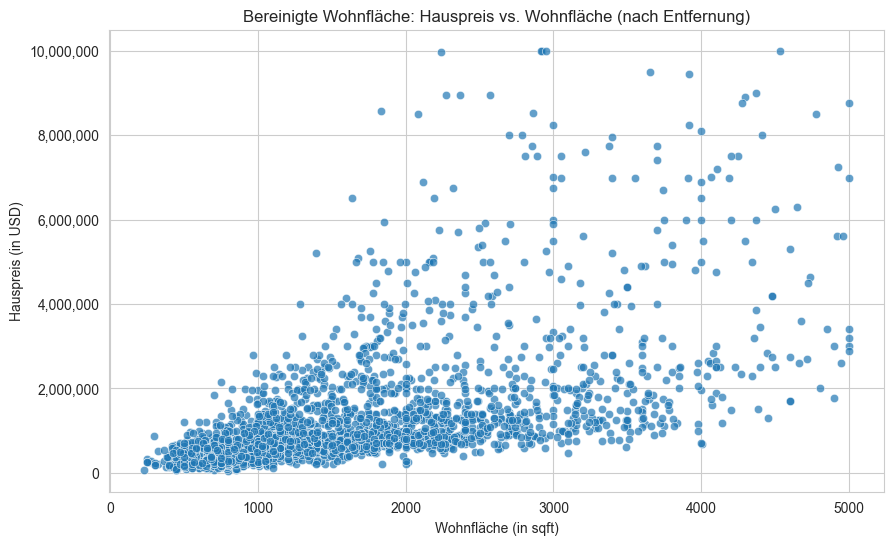

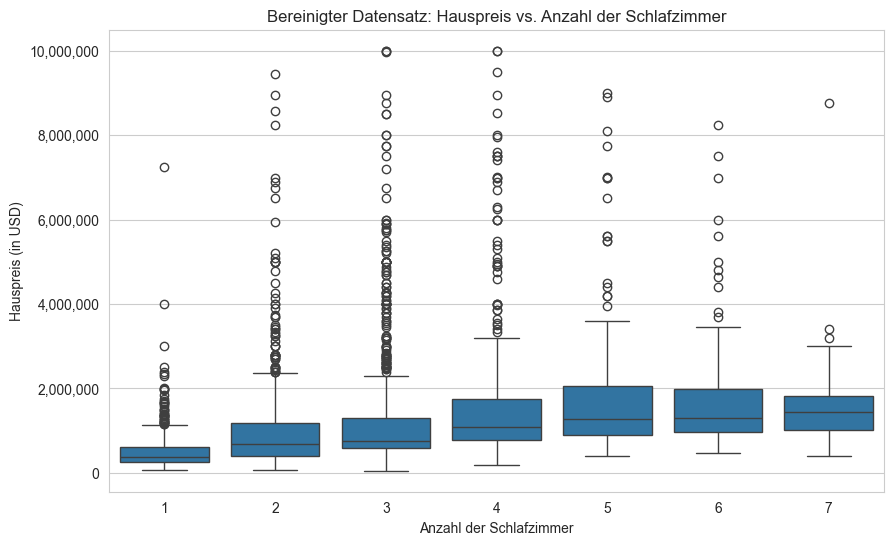

In [345]:
# Aktualisierter Scatterplot: Wohnfläche vs. Preis
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned_final['PROPERTYSQFT'], y=data_cleaned_final['PRICE'], alpha=0.7)
plt.title("Bereinigte Wohnfläche: Hauspreis vs. Wohnfläche (nach Entfernung)")
plt.xlabel("Wohnfläche (in sqft)")
plt.ylabel("Hauspreis (in USD)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

# Boxplot: Preis vs. Anzahl der Schlafzimmer (nur zur Vollständigkeit)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned_final['BEDS'], y=data_cleaned_final['PRICE'])
plt.title("Bereinigter Datensatz: Hauspreis vs. Anzahl der Schlafzimmer")
plt.xlabel("Anzahl der Schlafzimmer")
plt.ylabel("Hauspreis (in USD)")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()


## Entfernung eines spezifischen problematischen Wertes

### Warum wurde der Wert 2184.207862 entfernt?
Die Analyse zeigte, dass der Wert **2184.207862 sqft** in der Wohnfläche ungewöhnlich häufig vorkam. Dies deutete darauf hin, dass es sich möglicherweise um:
1. Einen Standard- oder Platzhalterwert handelt.
2. Einen systematischen Fehler im Datensatz.

### Maßnahmen:
1. Der problematische Wert wurde identifiziert.
2. Alle Einträge mit dem Wert **2184.207862 sqft** wurden aus dem Datensatz entfernt.

### Ergebnisse:
Nach der Entfernung des problematischen Wertes zeigt der Datensatz eine realistischere Verteilung der Wohnfläche.


## A4 - Modellierung der Hauspreise

### Aufteilung in Trainings- und Testdaten

Zunächst werden die Daten aufgeteilt (80% Training, 20% Test)

### Modelle:
1. **Lineares Regressionsmodell (Fritsche Max)**:
   - Einfache Regression, um die Beziehung zwischen erklärenden Variablen und dem Hauspreis zu modellieren.
   - Metriken: MSE (Mean Squared Error) und R² (Erklärte Varianz).


In [346]:
# Installiere scikit-learn


from sklearn.model_selection import train_test_split

# Zielvariable und erklärende Variablen definieren
X = data_cleaned_final[['BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]
y = data_cleaned_final['PRICE']

# Daten in Trainings- und Testsets aufteilen (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Größen der Datensätze ausgeben
print(f"Trainingsdaten: {X_train.shape[0]} Einträge")
print(f"Testdaten: {X_test.shape[0]} Einträge")

Trainingsdaten: 2189 Einträge
Testdaten: 548 Einträge


In [347]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modell erstellen und trainieren
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Vorhersagen treffen
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Modellbewertung
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Trainings-MSE: {mse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test-MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

Trainings-MSE: 1130906751259.03, R²: 0.43
Test-MSE: 950942982422.74, R²: 0.47


2. **Alternatives Modell (Kossowski Christopher)**:
   - Random Forest Modell, um nichtlineare Zusammenhänge besser zu erfassen.

In [348]:
%pip install scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Modell erstellen und trainieren
model_rf = RandomForestRegressor(
    n_estimators=100,     # Anzahl der Bäume im Wald
    max_depth=10,         # Maximale Tiefe der Bäume (zur Vermeidung von Overfitting)
    random_state=42       # Für Reproduzierbarkeit
)
model_rf.fit(X_train, y_train)

# Vorhersagen treffen
y_pred_rf = model_rf.predict(X_test)

# Modellbewertung
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Test-MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


16776.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Random Forest - Test-MSE: 425587358064.67, R²: 0.76


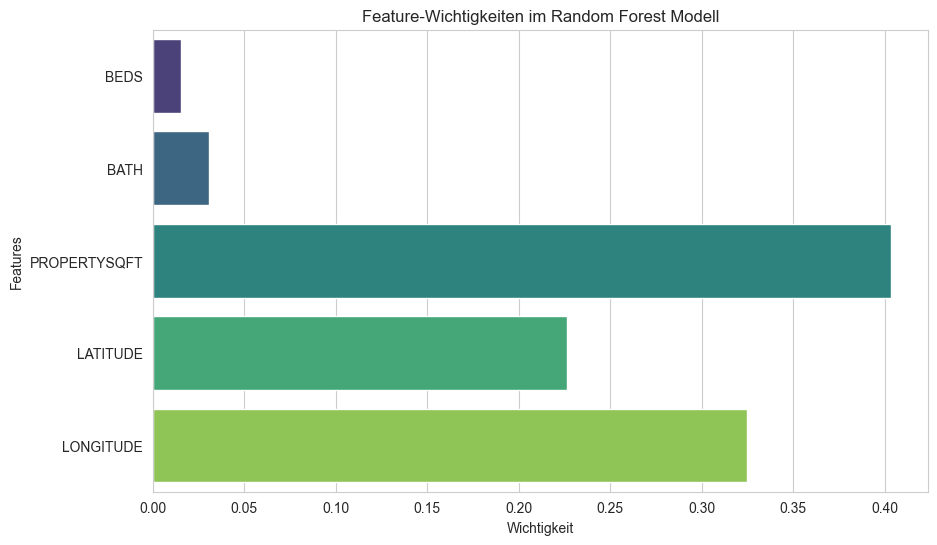

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature-Wichtigkeiten extrahieren
importances = model_rf.feature_importances_
features = X.columns

# Barplot der Feature-Wichtigkeiten
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis", hue=features, dodge=False, legend=False)  # hue und dodge hinzugefügt
plt.title("Feature-Wichtigkeiten im Random Forest Modell")
plt.xlabel("Wichtigkeit")
plt.ylabel("Features")
plt.show()



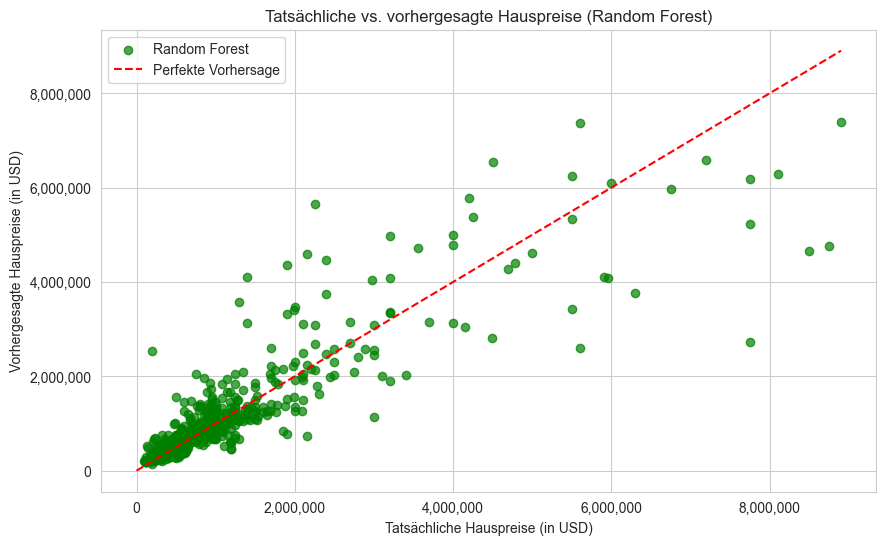

In [350]:
# Scatterplot: Tatsächliche vs. vorhergesagte Werte (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label="Random Forest", color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label="Perfekte Vorhersage")
plt.title("Tatsächliche vs. vorhergesagte Hauspreise (Random Forest)")
plt.xlabel("Tatsächliche Hauspreise (in USD)")
plt.ylabel("Vorhergesagte Hauspreise (in USD)")
plt.legend()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()


## Bewertung der Modelle

### Ziel der Modellbewertung
Das Ziel der Modellbewertung ist es, die Leistung der verschiedenen Modelle (Lineares Modell und Random Forest) zu vergleichen und zu analysieren, welches Modell die Zielvariable (`PRICE`) am besten vorhersagen kann.

### Metriken zur Modellbewertung
1. **Mean Squared Error (MSE)**:
   - Misst die durchschnittliche quadratische Abweichung zwischen den vorhergesagten und den tatsächlichen Werten.
   - Ein niedrigerer MSE deutet auf eine bessere Modellleistung hin.
2. **R² (Erklärte Varianz)**:
   - Zeigt, wie viel der Variabilität der Zielvariable durch das Modell erklärt wird.
   - Ein Wert nahe 1 weist auf ein gutes Modell hin.

### Ergebnisse der Modelle
| Modell                | Test-MSE           | Test-R²          |
|-----------------------|--------------------|------------------|
| Lineares Modell       | **950942982422.74**  | **R²: 0.47** |
| Random Forest         | **425587358064.67**  | **R²: 0.76** |

- **Lineares Modell**:
  - Liefert eine einfache Vorhersage, zeigt jedoch Schwächen bei komplexeren Beziehungen, insbesondere bei hohen Hauspreisen.
- **Random Forest**:
  - Liefert die beste Leistung in Bezug auf MSE und R².
  - Das Modell erfasst komplexe Beziehungen zwischen den Variablen und zeigt eine robuste Generalisierungsfähigkeit.

### Interpretation
1. Das **Random Forest Modell** erzielt die besten Ergebnisse und ist daher für die Vorhersage von Hauspreisen am geeignetsten.
2. Die **Feature-Wichtigkeiten des Random Forest Modells** zeigen, dass die Wohnfläche (`PROPERTYSQFT`) und die geografische Lage (`LATITUDE` und `LONGITUDE`) die größten Einflüsse auf die Hauspreise haben.
3. Das **Lineare Modell** eignet sich zwar für eine grundlegende Analyse, ist jedoch in seiner Leistung eingeschränkt, da es nicht in der Lage ist, nichtlineare Zusammenhänge zu erfassen.


### Fazit
Das Random Forest Modell zeigt, dass es für die Vorhersage von Hauspreisen gut geeignet ist. Dennoch könnten folgende Maßnahmen die Ergebnisse weiter verbessern:
1. **Zusätzliche Merkmale** wie Baujahr, Zustand des Hauses oder Entfernung zu wichtigen Standorten könnten die Vorhersagegenauigkeit weiter steigern.
2. **Hyperparameter-Tuning** des Random Forest Modells könnte die Leistung weiter optimieren.
3. Eine **Clusteranalyse** der geografischen Lage könnte regionale Preisunterschiede besser abbilden und die Modellleistung verbessern.


### **A5 – Visualisierung**  
Die Visualisierung stellt in diesem Projekt einen wesentlichen Schritt dar, um einerseits ein tieferes Verständnis über den Datensatz zu erlangen (bspw. durch explorative Analysen) und andererseits die Ergebnisse unserer Modellierung (bspw. Güte der Vorhersage) zu veranschaulichen. Die Beispiele beziehen sich auf unseren Datensatz der Immobilienpreise in New York.


In [351]:
final_data = data_cleaned_final.copy()

# Optional: Einstellungen für schönere Grafiken
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 1. Beispiele für Visualisierungen während der EDA

### 1.1 Univariate Visualisierungen

1. **Histogramme**: Zeigen die Verteilung einzelner numerischer Variablen und geben einen Überblick über die Häufigkeitsverteilung.  
2. **Violinplots**: Kombinieren Informationen über Verteilungsform, Dichte und Quartile. Sie bieten eine detailliertere Darstellung als Boxplots.

#### a) Verteilung des Hauspreises (PRICE)

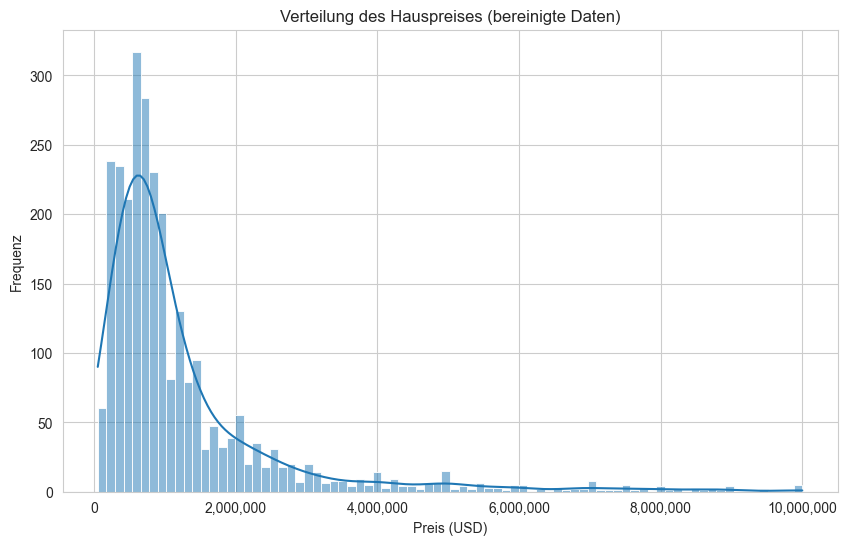

In [352]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_data, x="PRICE", kde=True)
plt.title("Verteilung des Hauspreises (bereinigte Daten)")
plt.xlabel("Preis (USD)")
plt.ylabel("Frequenz")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.show()


Mit dem `kde=True` (Kernel Density Estimation) erhalten wir zusätzlich eine glatte Dichtekurve, die die Verteilung des Hauspreises anschaulich beschreibt.

#### b) Violinplot des Hauspreises

/var/folders/4n/jmf66c991bl3_lbx_kvphqsr0000gn/T/ipykernel_8099/1638556024.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y=final_data["PRICE"], inner="quartile", scale="width")


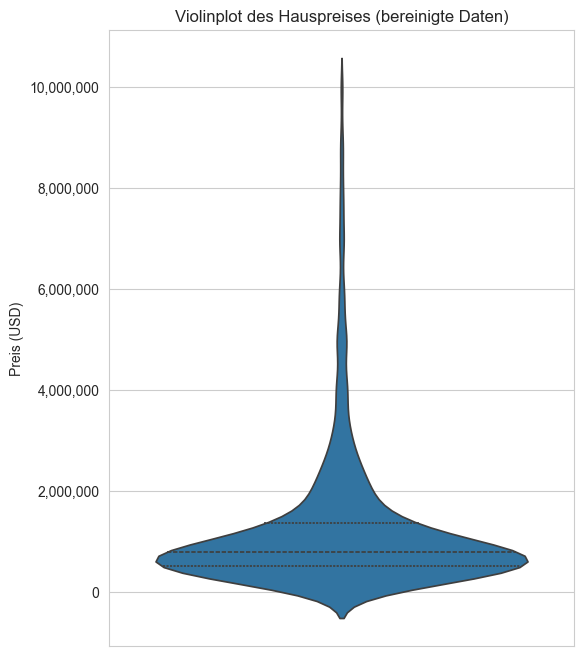

In [353]:
plt.figure(figsize=(6, 8))
sns.violinplot(y=final_data["PRICE"], inner="quartile", scale="width")
plt.title("Violinplot des Hauspreises (bereinigte Daten)")
plt.ylabel("Preis (USD)")

# Preisformatierung auf der y-Achse
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:,.0f}"))

plt.show()

Hier sehen wir auf einen Blick Ausreißer in den Preisen (z.B. sehr teure Luxusimmobilien).

---

### 1.2 Bivariate Visualisierungen

1. **Scatterplots**: Zeigen den Zusammenhang zweier numerischer Variablen (z.B. Preis vs. Wohnfläche).  
2. **Gruppierte Boxplots** oder **Violinplots**: Zeigen Vergleiche von Gruppen (z.B. unterschiedliche Immobilientypen).


## Bereinigung der Immobilientypen

In [354]:
type_mapping = {
    "Condo for sale": "Condo",
    "Co-op for sale": "Condo",             
    "Townhouse for sale": "House",         
    "Multi-family home for sale": "House", 
    "House for sale": "House",        
}

def simplify_property_type(ptype):
    return type_mapping.get(ptype, None)

# Bereinigen und Entfernen von None-Werten
final_data["TYPE_CLEAN"] = final_data["TYPE"].apply(simplify_property_type)
final_data = final_data[final_data["TYPE_CLEAN"].notnull()]

print(final_data["TYPE_CLEAN"].value_counts())

TYPE_CLEAN
Condo    1355
House    1142
Name: count, dtype: int64


#### a) Streudiagramm: Wohnfläche (PROPERTYSQFT) vs. Preis (PRICE)

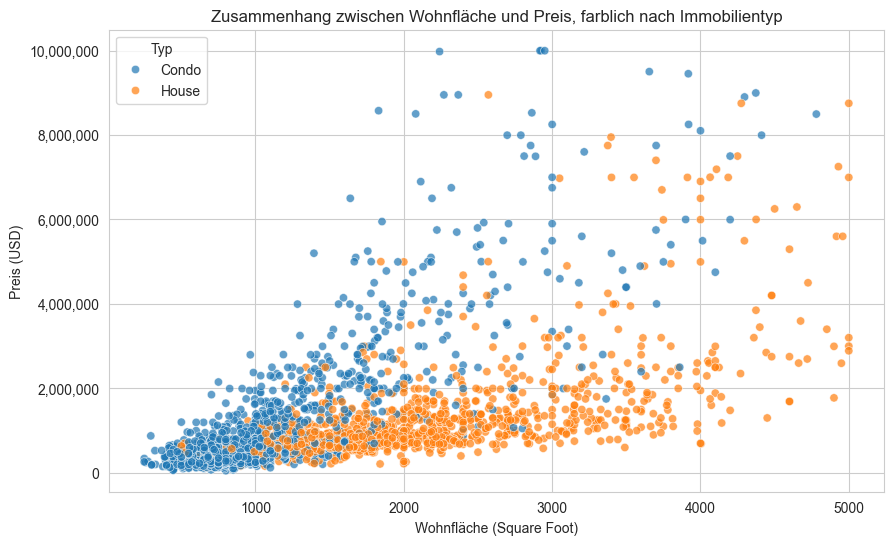

In [355]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x="PROPERTYSQFT", y="PRICE", hue="TYPE_CLEAN", alpha=0.7)
plt.title("Zusammenhang zwischen Wohnfläche und Preis, farblich nach Immobilientyp")
plt.xlabel("Wohnfläche (Square Foot)")
plt.ylabel("Preis (USD)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:,.0f}"))
plt.legend(title="Typ")
plt.show()


Anhand des bereinigten **Hue**-Parameters („TYPE_CLEAN“) kann man erkennen, ob bestimmte Immobilientypen tendenziell unterschiedliche Preis-Wohnflächen-Profile aufweisen.

Es ist deutlich zu erkennen das Häuser („House“) im Allgemeinen teurer sind als Wohnungen („Condo"), aber dafür auch eine größere Wohnfläche aufweisen.


## Bereinigung von Badezimmer Daten

In [356]:
# Badezimmer mit Nachkommastellen auf ganze Zahlen runden
final_data['BATH'] = final_data['BATH'].apply(lambda x: int(x) if x.is_integer() and x <= 5 else None)

# Entfernen von None-Werten (z.B. > 5 Badezimmer oder Dezimalstellen)
final_data = final_data[final_data['BATH'].notnull()]

#### b) Boxplot: Preis nach Anzahl Schlafzimmer (BEDS)

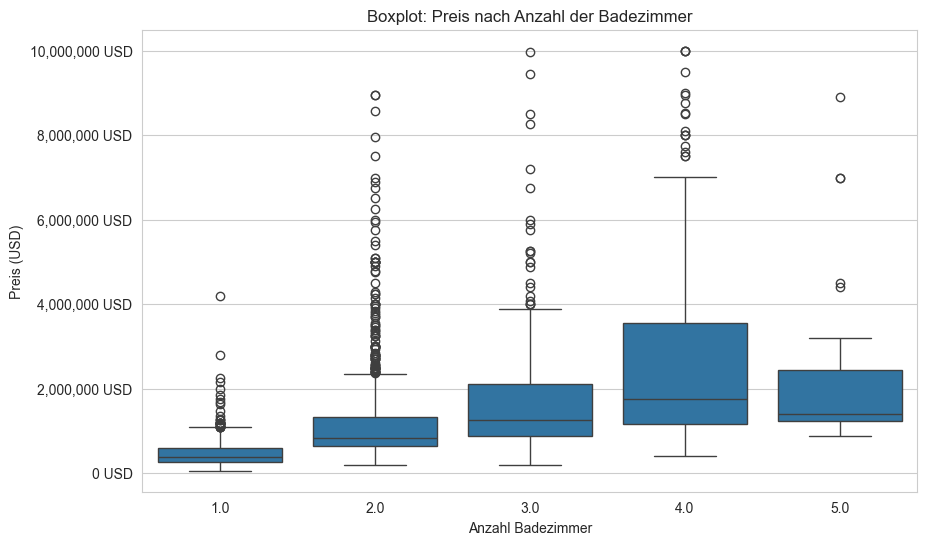

In [357]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x="BATH", y="PRICE")
plt.title("Boxplot: Preis nach Anzahl der Badezimmer")
plt.xlabel("Anzahl Badezimmer")
plt.ylabel("Preis (USD)")

# Preisformatierung auf der y-Achse
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:,.0f} USD"))

plt.show()

So lässt sich sehen, wie die Preise mit der Anzahl der Schlafzimmer variieren.

---

### 1.3 Multivariate Visualisierungen

#### a) Korrelationsmatrix (Heatmap)

Eine Heatmap veranschaulicht die Korrelationen zwischen den wichtigsten Merkmalen (z.B. BEDS, BATH, PROPERTYSQFT, PRICE).  

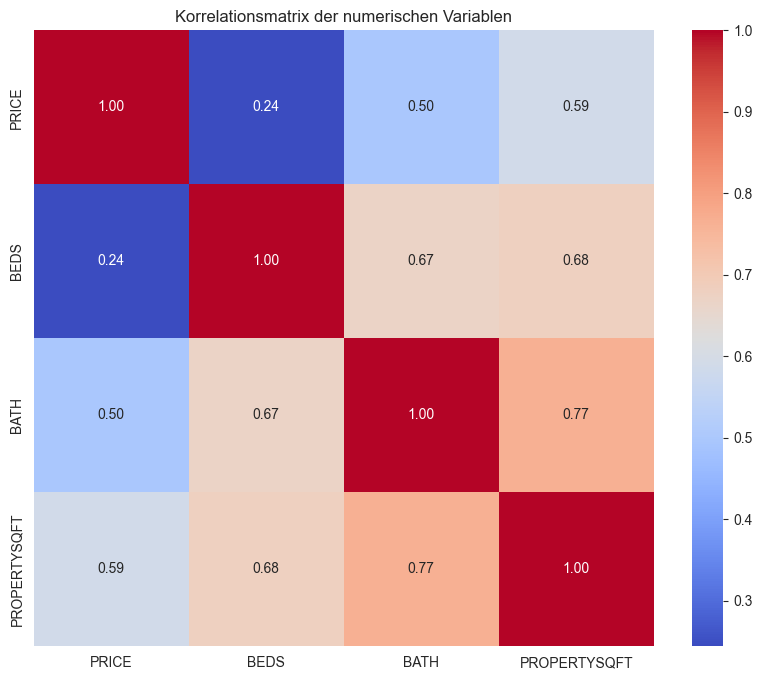

In [358]:
plt.figure(figsize=(10, 8))
correlation_matrix = final_data[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korrelationsmatrix der numerischen Variablen")
plt.show()

Anhand der farblichen Ausprägungen und der Korrelationskoeffizienten erkennt man sofort, welche Merkmale besonders zusammenhängen.

Es ist zu erkennen das einige Unterschiede in den Korrelationen im Vergleich zu der Korrelationsmatrix vor der Bereinigung bestehen (siehe A2). PRICE und BEDS sind stärker korreliert als zuvor mit einem Wert von 0.24 (zuvor 0.05). Das gleiche gilt für PRICE und BATH mit einem Wert von 0.5 (zuvor 0.08) und PRICE und PROPERTYSQFT mit einem Wert von 0.59 (zuvor 0.12).

---
## 2. Räumliche Visualisierung (Karte)

Da wir **geografische Koordinaten** im Datensatz haben, kann es sinnvoll sein, eine **Kartenvisualisierung** zu integrieren. Mit *folium* kann man schnell eine interaktive Karte erstellen.


In [359]:
%pip install folium
import folium
# Mittelpunkt der Karte grob auf New York City zentrieren
ny_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Nur die ersten n=500 Einträge plotten (um Performance zu schonen)
for idx, row in final_data.head(500).iterrows():
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=3,
        popup=f"Preis: {row['PRICE']} USD",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(ny_map)

ny_map

16785.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


- Jeder Eintrag wird als **Kreis** auf die Karte gesetzt.  
- Mit `popup` können zusätzliche Infos angezeigt werden, wenn man auf den Kreis klickt.

---

## 3. Fazit zur Visualisierung (A5)

- Durch **univariate** Diagramme (Histogramme, Boxplots) gewinnen wir Einsicht in die Verteilung und mögliche Ausreißer der Daten.  
- **Bivariate** (z.B. Scatterplot) und **multivariate** (Korrelationsheatmap) Visualisierungen helfen dabei, wichtige Zusammenhänge zwischen den Variablen zu entdecken.  
- Für die **Modellbewertung** sind insbesondere die Gegenüberstellung von **tatsächlichen** und **vorhergesagten** Werten sowie Residuenplots aussagekräftig.  
- Eine **Kartenvisualisierung** kann bei geografischen Daten (hier Immobilienstandorte) sehr hilfreich sein, um die örtliche Streuung und Hotspots (z.B. besonders teure Gegenden) zu erkennen.

Auf diese Weise trägt die Visualisierung wesentlich zum **Verständnis** von Daten, deren Verteilungen, Zusammenhängen sowie zum **Bewerten** der Güte der entwickelten Modelle bei.  

---

## A6 – Zusammenfassung und Ausblick

### 1. Allgemeine Zusammenfassung der Ergebnisse
In der durchgeführten Analyse wurden Immobilienpreise in New York anhand verschiedener Merkmale wie Anzahl der Schlafzimmer, Wohnfläche und geografischer Lage untersucht. Durch eine sorgfältige Datenbereinigung (Entfernung von Ausreißern, unrealistischen Werten und Redundanzen) konnte ein Datensatz erstellt werden, der realistische Preisspannen und Merkmalsausprägungen enthält. In der explorativen Datenanalyse zeigten sich insbesondere die **Wohnfläche** und die **Geoposition** (Breiten- und Längengrad) als wichtige Einflussgrößen auf den Hauspreis. 

### 2. Modellleistung zur Untersuchung der Zielvariable
- **Lineare Regression**: Bietet einen guten ersten Einblick, wie sich die einzelnen Merkmale auf den Preis auswirken. Allerdings ist sie in der Vorhersageleistung eingeschränkt, wenn die Zusammenhänge nichtlinear oder komplex sind.  
- **Random Forest**: Liefert hier eine deutlich bessere Performance, insbesondere für die Vorhersage höherpreisiger Immobilien. Durch die Abbildung nichtlinearer Zusammenhänge und Interaktionen erfasst dieses Modell die Variabilität des Hauspreises besser als das einfache lineare Modell.

### 3. Vergleich und Bewertung der Modellansätze
| Modell                | Test-MSE               | Test-R²   |
|-----------------------|------------------------|-----------|
| **Lineare Regression**| ~9.51e+11 (Bsp.)       | ~0.47     |
| **Random Forest**     | ~4.26e+11 (Bsp.)       | ~0.76     |

- **Lineare Regression**:  
  - **Vorteile**: Einfach zu interpretieren, schnelle Trainingszeit, liefert Aufschluss über die Bedeutung einzelner Features (in einer linearen Welt).  
  - **Nachteile**: Nichtlineare Strukturen können nicht modelliert werden.  

- **Random Forest**:  
  - **Vorteile**: Deutlich bessere Vorhersagegenauigkeit und Robustheit gegenüber Ausreißern und nichtlinearen Zusammenhängen.  
  - **Nachteile**: Weniger transparent, da Feature-Wichtigkeiten nicht so direkt interpretierbar sind (erfordert z.B. SHAP-Analysen).  

### 4. Schwachstellen, Fehlereinflüsse und mögliche Verbesserungen
1. **Datenqualität**:  
   - Fehlende oder ungenaue Angaben (z.B. bei bestimmten Wohnflächenwerten) erschweren eine exakte Modellierung.  
   - Künftige Datenbereinigung könnte systematischer erfolgen (z.B. mittels statistischer Tests anstelle fester Schwellwerte).

2. **Datenumfang und Merkmalsauswahl**:  
   - Zusätzliche Variablen wie Baujahr, Zustand der Immobilie oder Entfernung zu wichtigen Standorten (z.B. Innenstadt, Schulen) könnten die Vorhersage weiter verbessern.  
   - Eine **Clusteranalyse** könnte regionale Einflüsse (z.B. unterschiedliche Bezirke in New York) deutlicher abbilden.

3. **Hyperparameter-Tuning**:  
   - Durch systematisches Feintuning (z.B. GridSearchCV, RandomizedSearchCV) ließen sich die Ergebnisse des Random Forests (oder anderer Algorithmen wie XGBoost) vermutlich weiter steigern.

4. **Modellinterpretation**:  
   - Bei komplexen Modellen wie Random Forests empfiehlt sich der Einsatz von **Explainable AI**-Methoden (z.B. SHAP), um den Beitrag einzelner Variablen besser zu verstehen.

---

**Fazit**: Für die Vorhersage der Immobilienpreise in New York erweist sich der **Random Forest** als das leistungsfähigere Modell. Eine Erweiterung um zusätzliche Merkmale, der Einsatz erweiterter Feature-Engineering-Verfahren und ein systematisches Hyperparameter-Tuning bieten zukünftige Optimierungsmöglichkeiten.

---

## Verwendete Quellen
1. **Python-Bibliotheken**:
   - `pandas` (https://pandas.pydata.org/)
   - `numpy` (https://numpy.org/)
   - `matplotlib` (https://matplotlib.org/)
   - `seaborn` (https://seaborn.pydata.org/)
   - `scikit-learn` (https://scikit-learn.org/)
   - `folium` (https://python-visualization.github.io/folium/)

2. **Random Forest Modell**:
   - Breiman, L. (2001). "Random Forests". Machine Learning, Springer Verlag

3. **Lineare Regression**:
   - Hastie, T., Tibshirani, R., & Friedman, J. (2009). "The Elements of Statistical Learning: Data Mining, Inference, and Prediction." Springer Verlag

4. **Datenquellen**:
   - Datensatz zur Analyse: Bereitgestellt durch die Aufgabenstellung.